<a href="https://colab.research.google.com/github/VeraVe111/Salud-mental-Proyecto-final/blob/main/Actividad_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Cargar los archivos CSV
df_inegi = pd.read_csv("Mental_05.csv")
df_lifestyle = pd.read_csv("Mental_Health_Lifestyle_Dataset (1).csv")

In [ ]:
# Proceso ETL para dataset 1 INEGI
df_inegi_clean = df_inegi.copy()

# Eliminar columnas duplicadas
df_inegi_clean = df_inegi_clean.loc[:, ~df_inegi_clean.columns.duplicated()]

# Eliminar filas completamente vacías
df_inegi_clean.dropna(how='all', inplace=True)

# Convertir nombres de columnas a formato estándar
df_inegi_clean.columns = [col.strip().lower().replace(" ", "_") for col in df_inegi_clean.columns]

# Convertir columnas numéricas si aplica
for col in df_inegi_clean.columns:
    df_inegi_clean[col] = pd.to_numeric(df_inegi_clean[col], errors='ignore')


<ipython-input-5-8b443d5ba243>:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_inegi_clean[col] = pd.to_numeric(df_inegi_clean[col], errors='ignore')


In [ ]:
# Proceso ETL para dataset 2 Lifestyle
df_lifestyle_clean = df_lifestyle.copy()

# Eliminar columnas no útiles
if 'Timestamp' in df_lifestyle_clean.columns:
    df_lifestyle_clean.drop(columns=['Timestamp'], inplace=True)

# Eliminar valores nulos
df_lifestyle_clean.dropna(inplace=True)

# Estandarizar nombres de columnas
df_lifestyle_clean.columns = [col.strip().lower().replace(" ", "_") for col in df_lifestyle_clean.columns]

# Mapear respuestas Yes/No a 1/0
df_lifestyle_clean.replace({'Yes': 1, 'No': 0}, inplace=True)

# Convertir variable objetivo en binaria
df_lifestyle_clean['mental_health_condition'] = df_lifestyle_clean['mental_health_condition'].apply(lambda x: 1 if x == 1 or x == 'Yes' else 0)

# Codificar variables categóricas
df_lifestyle_encoded = pd.get_dummies(df_lifestyle_clean, drop_first=True)

# Guardar datasets limpios si lo deseas
df_inegi_clean.to_csv("inegi_limpio.csv", index=False)
df_lifestyle_encoded.to_csv("lifestyle_limpio.csv", index=False)

In [ ]:
# Rehacer transformación
df_lifestyle_clean = df_lifestyle.copy()

# Eliminar columna irrelevante si existe
if 'Timestamp' in df_lifestyle_clean.columns:
    df_lifestyle_clean.drop(columns=['Timestamp'], inplace=True)

# Eliminar valores nulos
df_lifestyle_clean.dropna(inplace=True)

# Renombrar columnas
df_lifestyle_clean.columns = [col.strip().lower().replace(" ", "_") for col in df_lifestyle_clean.columns]

# Convertir respuestas categóricas simples a valores numéricos
map_yn = {'Yes': 1, 'No': 0}
df_lifestyle_clean.replace(map_yn, inplace=True)

# Convertir la columna objetivo a binaria si no lo está
df_lifestyle_clean['mental_health_condition'] = df_lifestyle_clean[
    'mental_health_condition'
].apply(lambda x: 1 if x == 1 or x == 'Yes' else 0)

# Codificar variables categóricas restantes
df_lifestyle_encoded = pd.get_dummies(df_lifestyle_clean, drop_first=True)

# Mostrar vista previa de ambos datasets limpios
df_inegi_clean.head(), df_lifestyle_encoded.head()

(  instituto_nacional_de_estadística_y_geografía_(inegi)           unnamed:_1  \
 0  Tasa de casos nuevos de enfermedades sobre tra...                     NaN   
 2             Fecha de consulta: 08/04/2025 23:24:49                     NaN   
 4                                               Tasa                     NaN   
 5                                 Entidad federativa     Casos seleccionados   
 6                                 Entidad federativa     Casos seleccionados   
 
   unnamed:_2 unnamed:_3 unnamed:_4 unnamed:_5 unnamed:_6 unnamed:_7  \
 0        NaN        NaN        NaN        NaN        NaN        NaN   
 2        NaN        NaN        NaN        NaN        NaN        NaN   
 4        NaN        NaN        NaN        NaN        NaN        NaN   
 5       2021       2021       2021       2022       2022       2022   
 6      Total    Hombres    Mujeres      Total    Hombres    Mujeres   
 
   unnamed:_8 unnamed:_9 unnamed:_10  
 0        NaN        NaN         NaN  


Para el módelo de análisis predictivo voy a usar el dataset de Mental Health Lifestyle

In [ ]:
import pandas as pd

# Cargar datasets
mental = pd.read_csv("Mental_05.csv")
lifestyle = pd.read_csv("Mental_Health_Lifestyle_Dataset (1).csv")

# Limpieza del dataset de INEGI (mental)
mental = mental.dropna(how='all').dropna(axis=1, how='all')

# Limpieza del dataset de estilo de vida (lifestyle)
# No tiene valores nulos, pero convertimos texto a formato máquina
lifestyle_clean = lifestyle.copy()
lifestyle_clean["Mental Health Condition"] = lifestyle_clean["Mental Health Condition"].fillna("None")
lifestyle_clean["Has_Mental_Condition"] = lifestyle_clean["Mental Health Condition"].apply(lambda x: 0 if x == "None" else 1)

# Codificación de variables categóricas
lifestyle_encoded = pd.get_dummies(lifestyle_clean.drop(columns=["Mental Health Condition"]), drop_first=True)

# Dataset final para modelado
X = lifestyle_encoded.drop("Has_Mental_Condition", axis=1)
y = lifestyle_encoded["Has_Mental_Condition"]

Módelo predictivo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.82      1.00      0.90       492

    accuracy                           0.82       600
   macro avg       0.41      0.50      0.45       600
weighted avg       0.67      0.82      0.74       600



In [ ]:
pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
pip install streamlit-lottie

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.4/802.4 kB 13.5 MB/s eta 0:00:00


In [ ]:
!pip install streamlit -q # Install the streamlit library

In [ ]:
import streamlit as st

In [ ]:
# Código notebook
# ejecutar en el modelo

import joblib

# Ensure 'model' is defined from your previous cell
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Cargar datasets
mental = pd.read_csv("Mental_05.csv")
lifestyle = pd.read_csv("Mental_Health_Lifestyle_Dataset (1).csv")

# Limpieza del dataset de INEGI (mental)
mental = mental.dropna(how='all').dropna(axis=1, how='all')

# Limpieza del dataset de estilo de vida (lifestyle)
# No tiene valores nulos, pero convertimos texto a formato máquina
lifestyle_clean = lifestyle.copy()
lifestyle_clean["Mental Health Condition"] = lifestyle_clean["Mental Health Condition"].fillna("None")
lifestyle_clean["Has_Mental_Condition"] = lifestyle_clean["Mental Health Condition"].apply(lambda x: 0 if x == "None" else 1)

# Codificación de variables categóricas
lifestyle_encoded = pd.get_dummies(lifestyle_clean.drop(columns=["Mental Health Condition"]), drop_first=True)

# Dataset final para modelado
X = lifestyle_encoded.drop("Has_Mental_Condition", axis=1)
y = lifestyle_encoded["Has_Mental_Condition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



# Now you can save the model
joblib.dump(model, 'modelo_salud_mental.pkl')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.82      1.00      0.90       492

    accuracy                           0.82       600
   macro avg       0.41      0.50      0.45       600
weighted avg       0.67      0.82      0.74       600



['modelo_salud_mental.pkl']

In [ ]:
# Guardar este archivo como app.py
import streamlit as st
import pandas as pd
import joblib

st.title("Dashboard Predictivo: Salud Mental y Estilo de Vida")

# Cargar modelo
model = joblib.load("modelo_salud_mental.pkl")

# Inputs del usuario
age = st.slider("Edad", 18, 65)
sleep = st.slider("Horas de sueño", 0.0, 12.0, 7.0)
screen_time = st.slider("Horas de pantalla al día", 0.0, 12.0, 4.0)
work_hours = st.slider("Horas de trabajo por semana", 0, 80, 40)
social_score = st.slider("Interacción social (0-10)", 0.0, 10.0, 5.0)
happiness = st.slider("Felicidad (0-10)", 0.0, 10.0, 6.0)

# Crear input para predicción
user_data = pd.DataFrame([{
    "Age": age,
    "Sleep Hours": sleep,
    "Screen Time per Day (Hours)": screen_time,
    "Work Hours per Week": work_hours,
    "Social Interaction Score": social_score,
    "Happiness Score": happiness
}])

# Predicción
if st.button("Predecir Salud Mental"):
    pred = model.predict(user_data)
    st.write("Probabilidad de condición de salud mental:" if pred[0] else "Sin indicios de condición mental.")

2025-04-13 23:31:26.206 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 23:31:27.036 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-13 23:31:27.039 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 23:31:27.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 23:31:27.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 23:31:27.151 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 23:31:27.156 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 23:31:27.158 Session state does not 

In [ ]:
# Guardar el modelo
import joblib
joblib.dump(model, 'modelo_salud_mental.pkl')

['modelo_salud_mental.pkl']

In [ ]:
import streamlit as st
import pandas as pd
import joblib

st.set_page_config(page_title="Predicción de Salud Mental", layout="centered")

st.title("Dashboard Predictivo: Salud Mental y Estilo de Vida")
st.markdown("Este modelo predice si una persona tiene probabilidad de presentar una condición de salud mental, según su estilo de vida.")

model = joblib.load("modelo_salud_mental.pkl")

age = st.slider("Edad", 18, 65)
sleep = st.slider("Horas de sueño", 0.0, 12.0, 7.0)
screen_time = st.slider("Horas frente a pantalla", 0.0, 12.0, 4.0)
work_hours = st.slider("Horas de trabajo/semana", 0, 80, 40)
social_score = st.slider("Puntaje de interacción social (0-10)", 0.0, 10.0, 5.0)
happiness = st.slider("Puntaje de felicidad (0-10)", 0.0, 10.0, 6.0)

data = pd.DataFrame([{
    "Age": age,
    "Sleep Hours": sleep,
    "Screen Time per Day (Hours)": screen_time,
    "Work Hours per Week": work_hours,
    "Social Interaction Score": social_score,
    "Happiness Score": happiness
}])

if st.button("Predecir"):
    prediction = model.predict(data)
    resultado = "Posible condición de salud mental." if prediction[0] == 1 else "Sin indicios de condición mental."
    st.success(resultado)

2025-04-13 23:31:44.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 23:31:44.287 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 23:31:44.288 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 23:31:44.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 23:31:44.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 23:31:44.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 23:31:44.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 23:31:44.336 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip install streamlit -q
import streamlit as st
import pandas as pd
import seaborn as sns
import datetime as dt # Correct the typo in module name: datatime to datetime
import joblib
import matplotlib.pyplot as plt

In [ ]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.5.2
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.15
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.5
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              4.9.0
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.7.1
arviz                              0.21.0
astropy                            7.0.1
astropy-iers-data                  0.2025.3.31.0.36.18
astunparse                         1.6.3
atpublic                           5.1
attrs                              25.3.0
audioread            

In [ ]:
pip install streamlit

In [ ]:
import streamlit as st
def main():
  st.tittle("Salud mental y Bienestar")

In [ ]:
!pip install -q streamlit

In [ ]:
%%writefile app.py
import streamlit as st
def main():
  st.tittle("Salud mental y Bienestar")

Overwriting app.py


In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴
up to date, audited 23 packages in 901ms
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠴

In [ ]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501

⠙your url is: https://metal-donkeys-win.loca.lt
^C


In [ ]:
import pandas as pd

# Assuming your data is in a CSV file named "data.csv"
df = pd.read_csv("Mental_Health_Lifestyle_Dataset (1).csv")

# Now you can use df
print(df.describe())

# Ejemplo: promedio de salud mental por edad o género (según columnas disponibles)
if 'edad' in df.columns and 'depresion' in df.columns:
    print(df.groupby('edad')['depresion'].mean())

               Age  Sleep Hours  Work Hours per Week  \
count  3000.000000  3000.000000          3000.000000   
mean     41.229667     6.475933            39.466333   
std      13.428416     1.499866            11.451459   
min      18.000000     1.400000            20.000000   
25%      30.000000     5.500000            30.000000   
50%      41.000000     6.500000            39.000000   
75%      53.000000     7.500000            50.000000   
max      64.000000    11.300000            59.000000   

       Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  
count                  3000.000000               3000.000000      3000.000000  
mean                      5.089833                  5.470200         5.395067  
std                       1.747231                  2.563532         2.557601  
min                       2.000000                  1.000000         1.000000  
25%                       3.600000                  3.300000         3.200000  
50%            

Exploración de datos - **Gráficas**

Index(['Country', 'Age', 'Gender', 'Exercise Level', 'Diet Type',
       'Sleep Hours', 'Stress Level', 'Mental Health Condition',
       'Work Hours per Week', 'Screen Time per Day (Hours)',
       'Social Interaction Score', 'Happiness Score'],
      dtype='object')


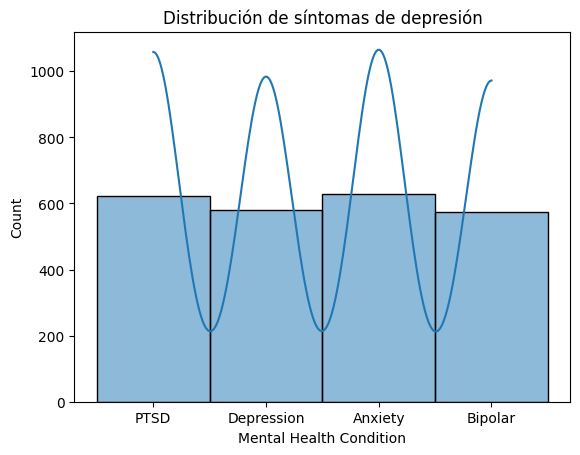

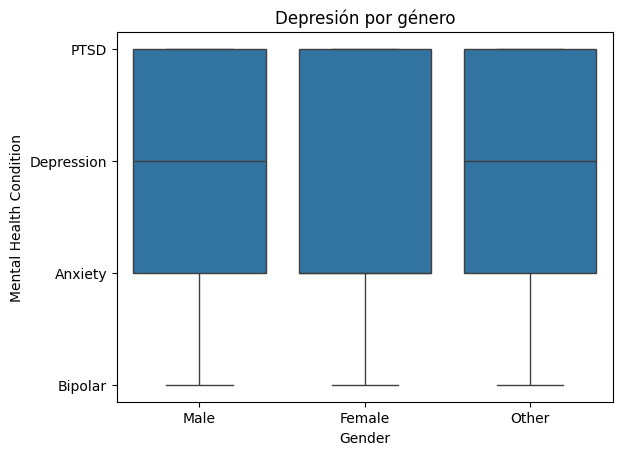

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a CSV file named "data.csv"
df = pd.read_csv("Mental_Health_Lifestyle_Dataset (1).csv")

# Print the available columns to verify the correct column name
print(df.columns)

# Replace 'depresion' with the actual column name related to depression symptoms
# For example, if the actual column name is "Mental Health Condition", use:
sns.histplot(df['Mental Health Condition'], kde=True) # Replace with the correct name
plt.title('Distribución de síntomas de depresión')
plt.show()

# Similarly, for the boxplot:
# Replace 'depresion' and 'sexo' if needed
if 'Gender' in df.columns:  # Replace 'sexo' with the actual gender column name if different
    sns.boxplot(x='Gender', y='Mental Health Condition', data=df)  # Replace with correct names
    plt.title('Depresión por género')
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

**Correlaciones**

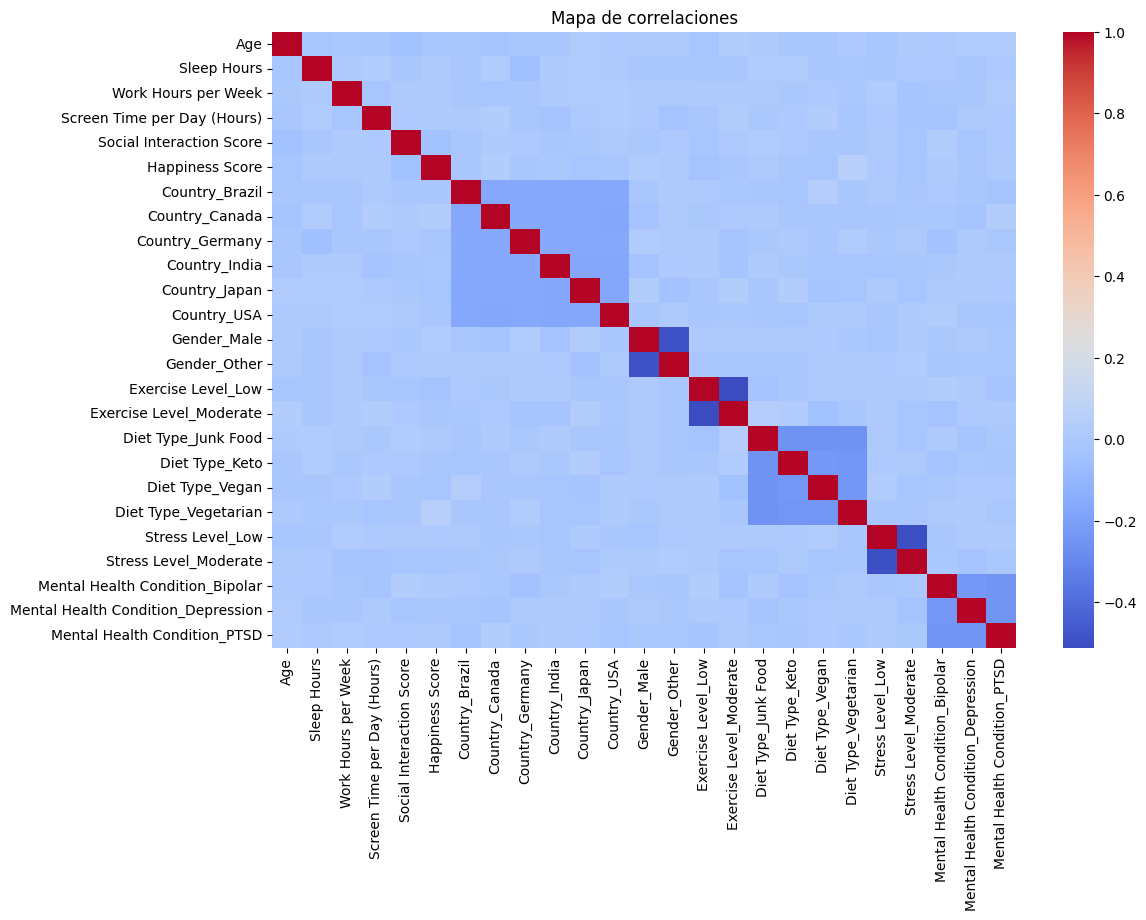

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a CSV file named "Mental_Health_Lifestyle_Dataset (1).csv"
df = pd.read_csv("Mental_Health_Lifestyle_Dataset (1).csv")

# ... (Your existing data cleaning and transformation code here if any)...

# Now you must define or create df_encoded here using your existing process:
# Assuming df_encoded represents one-hot encoded categorical features
# This is an example; replace with your actual encoding process from your previous cells
df_encoded = pd.get_dummies(df, drop_first=True)

# After creating df_encoded, you can now calculate the correlation and plot
# Matriz de correlación
corr_matrix = df_encoded.corr()

# Mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Mapa de correlaciones')
plt.show()

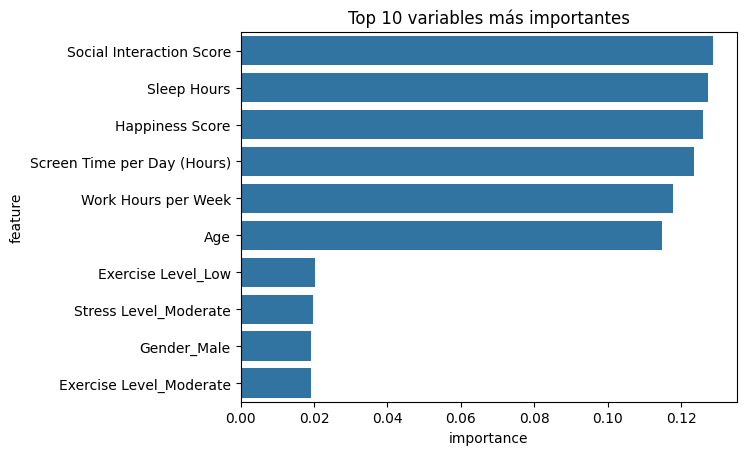

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Assuming X and y are defined from your previous cells
# If not, define them based on your dataset

# Load datasets (If not loaded already)
mental = pd.read_csv("Mental_05.csv")
lifestyle = pd.read_csv("Mental_Health_Lifestyle_Dataset (1).csv")

# Data cleaning and transformation (repeat from your previous code)
# ... (your data cleaning code here)...
# Assuming lifestyle_encoded is defined from your previous data cleaning steps
# If not, please define it according to your data preparation logic
lifestyle_clean = lifestyle.copy()
lifestyle_clean["Mental Health Condition"] = lifestyle_clean["Mental Health Condition"].fillna("None")
lifestyle_clean["Has_Mental_Condition"] = lifestyle_clean["Mental Health Condition"].apply(lambda x: 0 if x == "None" else 1)

lifestyle_encoded = pd.get_dummies(lifestyle_clean.drop(columns=["Mental Health Condition"]), drop_first=True)


# Dataset final para modelado (if not defined already)
X = lifestyle_encoded.drop("Has_Mental_Condition", axis=1)
y = lifestyle_encoded["Has_Mental_Condition"] # Define 'y' here using your target variable

# Split data into training and testing sets (if not done already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Define the model
model.fit(X_train, y_train)  # Train the model


# Extraer importancia de características
importances = model.feature_importances_
features = pd.DataFrame({'feature': X.columns, 'importance': importances})
features = features.sort_values(by='importance', ascending=False)

# Visualizar
sns.barplot(data=features.head(10), x='importance', y='feature')
plt.title('Top 10 variables más importantes')
plt.show()

In [ ]:
df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV
df.to_csv('archivo.csv', index=False)

In [ ]:
# Guardar CSV
features.to_csv('importancia_variables_rf.csv', index=False)

In [ ]:
# Guardar accuracy de validación cruzada
from sklearn.model_selection import cross_val_score

# Assuming 'model', 'X', and 'y' are defined from previous cells
# If not, define them based on your dataset and model

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

# Now you have the 'scores' variable, and you can proceed to save them
results = pd.DataFrame({'Modelo': ['Random Forest']*5, 'Accuracy': scores})
results.to_csv('validacion_cruzada_resultados.csv', index=False)

In [ ]:
results = pd.DataFrame({'Modelo': ['Random Forest']*5, 'Accuracy': scores})
results.to_csv('validacion_cruzada_resultados.csv', index=False)

In [ ]:
# Guardar accuracy de validación cruzada
results = pd.DataFrame({'Modelo': ['Random Forest']*5, 'Accuracy': scores})
results.to_csv('validacion_cruzada_resultados.csv', index=False)

In [ ]:
pip install pandas matplotlib seaborn scikit-learn python-pptx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 12.1 MB/s eta 0:00:00


Archivo para el dashboard app.py

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Cargar modelo
modelo = joblib.load('modelo_salud_mental.pkl')

st.title("🎯 Dashboard de Predicción de [Salud Mental y Bienestar]")

st.markdown("Este dashboard muestra un análisis predictivo sobre los datos de [lifestyle_limpio.csv].")

# Cargar datos (subir CSV)
archivo = st.file_uploader("Sube tu archivo CSV", type=["csv"])
if archivo is not None:
    df = pd.read_csv(archivo)
    st.dataframe(df.head())

    # Predicciones
    if st.button("Realizar predicciones"):
        predicciones = modelo.predict(df)
        df['Predicción'] = predicciones
        st.success("¡Predicción completada!")
        st.dataframe(df)

2025-04-14 02:12:54.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 02:12:54.750 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 02:12:54.754 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 02:12:54.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 02:12:54.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 02:12:54.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 02:12:54.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 02:12:54.760 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [77]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.137.188:8501

  Stopping...
^C


2025-04-14 05:13:59.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 05:13:59.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 05:13:59.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 05:13:59.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 05:13:59.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 05:13:59.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 05:13:59.151 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 05:13:59.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

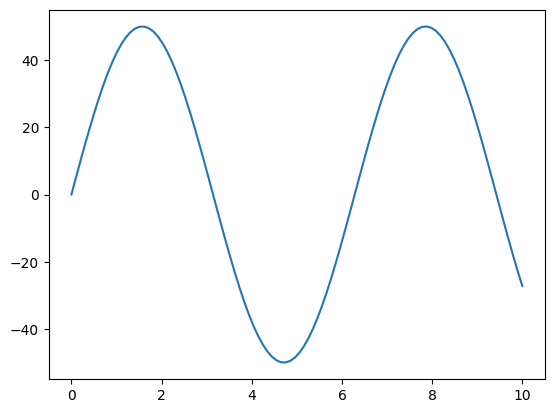

In [84]:
import streamlit as st

# dashboard salud mental
st.title("dashboard-salud-mental")

# Agregar un texto
st.write("La salud mental es fundamental para el bienestar")

# Agregar un slider
valor = st.slider("Selecciona un valor", 0, 100, 50)
st.write(f"El valor seleccionado es: {valor}")

# Agregar un gráfico simple
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.sin(x) * valor

plt.plot(x, y)
st.pyplot(plt)